# Evolution on rugged adaptive landscapes
## Obolski, Ram & Hadany
## Key Issues Review for Reports on Progress in Physics, 2017

This notebook contains text and Python code as the supporting material for

> Obolski, Ram & Hadany (2017) Evolution on rugged adaptive landscapes, Reports on Progress in Physics.

The most updated version of this notebook is on [GitHub](https://github.com/yoavram/UnderTheRug).

To run the notebook you will need Python (v.3.5), Jupyter notebook (v.4.3), NumPy (v1.11), Matplotlib (v.2.0), Seaborn (v.0.7), and Cython (v.0.25); see the [README](https://github.com/yoavram/UnderTheRug/blob/master/README.md) for more instructions.

# Notebook 2: NK model

The notebook includes code to generate random NK model landscapes and visualize these landscapes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=2)
red, blue, green = sns.color_palette('Set1', 3)

In [2]:
def neighbors(genotype, genotypes):
    return [g for g in genotypes if abs(g ^ genotype).sum() == 1]

def int2bits(k, N):
    x = list(map(int, bin(k)[2:]))
    pad = N - len(x)
    x = [0]*pad + x
    return x

def all_genotypes(N):
    return np.array([int2bits(k, N) for k in range(2**N)], dtype=bool)

In [31]:
def fitness_i(genotype, i, contribs, mem):
    key = tuple(zip(contribs[i], genotype[contribs[i]]))
    if key not in mem:
        mem[key] = np.random.uniform(0, 1)
    return mem[key]

def fitness(genotype, contribs, mem):
    return np.mean([
        fitness_i(genotype, i, contribs, mem) # ω_i
        for i in range(len(genotype))
    ])

In [35]:
def plot_NK_model(N, K, ax=None):
    genotypes = all_genotypes(N)
    contribs = {
        i: sorted(np.random.choice(
            [n for n in range(N) if n != i], 
            K, 
            replace=False
        ).tolist() + [i])
        for i in range(N)
    }
    fitness_mem = {}
    ws = [fitness(g, contribs, fitness_mem) for g in genotypes]
    max_w = max(ws)
    min_w = min(ws)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    for i, genotype in enumerate(genotypes):
        wi = (fitness(genotype, contribs, fitness_mem) - min_w) / (max_w - min_w)
        maximum = True
        minimum = True
        for g in neighbors(genotype, genotypes):   
            w = (fitness(g, contribs, fitness_mem) - min_w) / (max_w - min_w)
            if w > wi: 
                maximum = False
                ax.plot(
                    [genotype.sum(), g.sum()], 
                    [wi, w], 
                    ls='-', color='k', marker='', alpha=0.2
                )
            if w < wi: 
                minimum = False
        if maximum:
            ax.plot(genotype.sum(), wi, '^', color=red, markersize=10)
        elif minimum:
            ax.plot(genotype.sum(), wi, 'v', color=green, markersize=10)
        else:
            ax.plot(genotype.sum(), wi, '.', color=blue, markersize=10)
    ax.set(
        xlabel='Distance from {}'.format('0'*N),
        ylabel='Fitness',
    )
    sns.despine()
    return ax

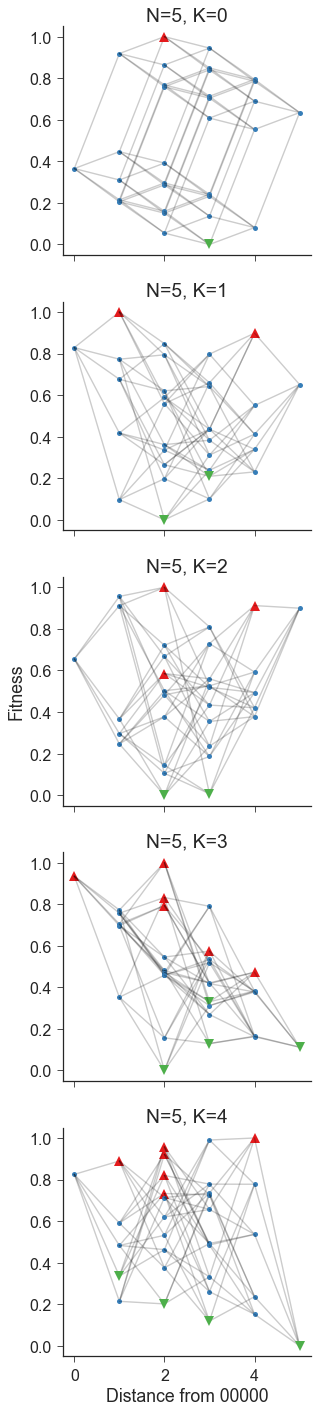

In [42]:
N = 5
fig, axes = plt.subplots(N, 1, figsize=(N, (N-1)*N), sharex=True, sharey=True)
for k, ax in enumerate(axes):
    plot_NK_model(N, k, ax=ax)
    ax.set_title('N={}, K={}'.format(len(axes), k))
    if k != N-1:
        ax.set_xlabel('')
    if k != N//2:
        ax.set_ylabel('')
fig.tight_layout()
fig.savefig('NK_model.tif', dpi=300)

# License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.